# 3
# welcome to drug_repurposing_kg approach 3

* the main goal of this notebook is to make a knowledge graph of medicines so we can find replacements for medicines and hidden insights

* the ontology will look like this:   
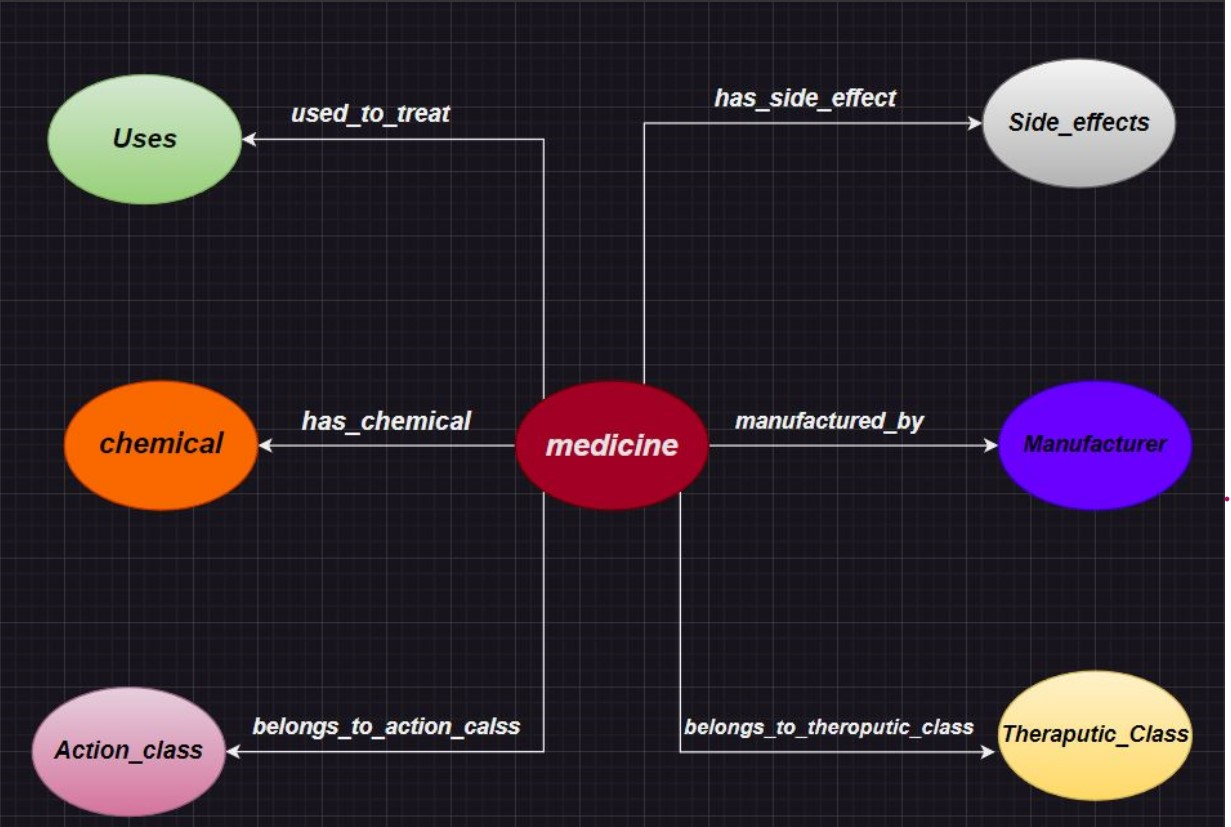

### By- Aryan rathore

# Index:

1. reading the data from drug_sample.xlxs
2. making the drug_repuposing_3 database and uploading the column as collections on arangodb
3. making the edge collections and uploading the rest of the data
4. saving the edge data dfs as jsons and uploading them to arangodb
5. uploading the edge collections on arangodb

In [1]:
import pandas as pd
import numpy as np
from arango import ArangoClient
import json
import ast

In [2]:
# ---------------------------------------------------------------------------------
# 1. reading the data from a_to_z_medicine_data_web_scraping.csv

sample1 = pd.read_csv("a_to_z_medicine_data_web_scraping.csv", index_col=0)
sample1.head()


,name,manufacturer,chemicals,uses,side_effects,Habit Forming,Therapeutic Class,Chemical Class,Action Class,MRP
0,Augmentin 625 Duo Tablet,Glaxo SmithKline Pharmaceuticals Ltd,Amoxycillin (500mg) + Clavulanic Acid (125mg),['Treatment of Bacterial infections'],"['Vomiting', 'Nausea', 'Diarrhea', 'Mucocutane...",No,ANTI INFECTIVES,NOT AVAIBLE,NOT AVAIBLE,452
1,Aricep 5 Tablet,Eisai Pharmaceuticals India Pvt Ltd,Donepezil (5mg),"[""Alzheimer's disease""]","['Nausea', 'Diarrhea', 'Insomnia (difficulty i...",No,NEURO CNS,Carbamate Derivative,Cholinesterase inhibitors - Alzheimer's disease,390
2,Avil 25 Tablet,Sanofi India Ltd,Pheniramine (25mg),"['Treatment of Allergic conditions', 'Treatmen...",['Sedation'],No,RESPIRATORY,Pyridines Derivatives,H1 Antihistaminics (First Generation),347
3,Azithral 500 Tablet,Alembic Pharmaceuticals Ltd,Azithromycin (500mg),['Treatment of Bacterial infections'],"['Nausea', 'Abdominal pain', 'Diarrhea']",No,ANTI INFECTIVES,Macrolides,Macrolides,105
4,Aciloc 150 Tablet,Cadila Pharmaceuticals Ltd,Ranitidine (150mg),['Treatment of Gastroesophageal reflux disease...,"['Headache', 'Diarrhea', 'Gastrointestinal dis...",No,GASTRO INTESTINAL,Aralkylamines Derivative,H2 Receptor Blocker,94


In [3]:
sample1=sample1.replace(np.nan, "Not Available")

In [4]:
'''

Columns to remove : Prescription, Type of Sell, Alternate Medicines, How to Use, How It Works
Columns to potentially add: MRP, Type of Sell, SAFETY ADVICE, SAFETY ADVICE wheight, Interaction with drug, Interaction with drug wheight

'''

'''
1. make new lerger dataset = sample1 + sample2
2. make the new edges and upload there data as collection

'''

'\n1. make new lerger dataset = sample1 + sample2\n2. make the new edges and upload there data as collection\n\n'

### The knowledge graph will have these edges:

| from --> to | edge_name | data_df |
| --- | --- | --- |
| 1. Medicine Name --> Manufacturer | manufactured_by |(med_manufactur_edge_df)|
| 2. Medicine Name --> Chemical  | has_chemical (concentration as wheight) |(med_chem_edge_df)|
| 3. Medicine Name --> Uses | used_for_treat |(med_uses_edge_df)|
| 4. Medicine Name --> Side Effects | has_side_effect |(med_side_effect_edge_df)|
| 5. Medicine Name --> Therapeutic Class | belongs_to_theraputic_class |(med_tclass_edge_df)|
| 6. Medicine Name --> Action Class | belongs_to_action_class |(med_aclass_edge_df)|
| 7. Medicine Name --> Chemical Class | belongs_to_chemical_class |(med_aclass_edge_df)|
| 8. Medicine Name --> Habit_froming | is_addictive |(med_aclass_edge_df)|

## new potential edges that can be made when more data is onboarded
| from --> to | edge_name | data_df |
| --- | --- | --- |
| 9. Medicine Name --> safety_advice | safety_advice (wheight)|(med_aclass_edge_df)| 
| 10. Medicine Name --> interactive_drug | interacts_with (wheight)|(med_aclass_edge_df)| 


In [8]:
# --------------------------------------------------------------------------------------------------------
# 2. making the drug_repuposing_3 database and uploading the column as collections on arangodb

client = ArangoClient(hosts="http://localhost:8529/")
sys_db = client.db("_system", username="root", password="")

sys_db.create_database("drug_repurposing_3")

medicine_database = client.db(name="drug_repurposing_3", username="root", password="")


In [9]:
# creating the neccesary collections in the arangodb database

medicine_database.create_collection(name="Manufacturer")
medicine_database.create_collection(name="Medicine")
medicine_database.create_collection(name="Chemical")
medicine_database.create_collection(name="Uses")
medicine_database.create_collection(name="Side_effects")
medicine_database.create_collection(name="Therapeutic_class")
medicine_database.create_collection(name="Action_class")
medicine_database.create_collection(name="Chemical_class")

Medicine_coll = medicine_database.collection(name="Medicine")
Manufacturer_coll = medicine_database.collection(name="Manufacturer")
Chemical_coll = medicine_database.collection(name="Chemical")
Uses_coll = medicine_database.collection(name="Uses")
Side_effects_coll = medicine_database.collection(name="Side_effects")
Therapeutic_class_coll = medicine_database.collection(name="Therapeutic_class")
Action_class_coll = medicine_database.collection(name="Action_class")
chemical_class_coll=medicine_database.collection(name="Chemical_class")

In [ ]:
# inserting values in medicine names in Chemical_class_coll

count = 0
for medicine in sample1["name"].unique():
    Medicine_coll.insert({"name":medicine})
    count += 1
    print(count, medicine)
else:
    print("------------------Success-------------------")

In [11]:
# inserting values in manufacturer names in Manufacturer_coll

count = 0
for manufactur in sample1["manufacturer"].unique():
    Manufacturer_coll.insert({"name":manufactur})
    count += 1
    # print(count, manufactur)
else:
    print("------------------Success-------------------")


------------------Success-------------------


In [ ]:
# inserting values in Therapeutic class names in Therapeutic_class_coll

count = 0
for tclass in sample1["Therapeutic Class"].unique():
    Therapeutic_class_coll.insert({"name":str(tclass)})
    count += 1
    print(count, tclass)
else:
    print("------------------Success-------------------")

In [ ]:
# inserting values in action class names in Action_class_coll

count = 0
for aclass in sample1["Action Class"].unique():
    Action_class_coll.insert({"name":str(aclass)})
    count += 1
    print(count, aclass)
else:
    print("------------------Success-------------------")

* the uses, side_effects, chemical collection are not preproccessed yet so i will uploading these later
* all the data will be replaced by their ids in aragodb to make the edge data dfs
* for example: Augmentin 625 Duo Tablet --> Medicine/1915333

In [16]:
sample1.head(5)

,name,manufacturer,chemicals,uses,side_effects,Habit Forming,Therapeutic Class,Chemical Class,Action Class
0,Augmentin 625 Duo Tablet,Glaxo SmithKline Pharmaceuticals Ltd,Amoxycillin (500mg) + Clavulanic Acid (125mg),['Treatment of Bacterial infections'],"['Vomiting', 'Nausea', 'Diarrhea', 'Mucocutane...",No,ANTI INFECTIVES,Not Available,Not Available
1,Aricep 5 Tablet,Eisai Pharmaceuticals India Pvt Ltd,Donepezil (5mg),"[""Alzheimer's disease""]","['Nausea', 'Diarrhea', 'Insomnia (difficulty i...",No,NEURO CNS,Carbamate Derivative,Cholinesterase inhibitors - Alzheimer's disease
2,Avil 25 Tablet,Sanofi India Ltd,Pheniramine (25mg),"['Treatment of Allergic conditions', 'Treatmen...",['Sedation'],No,RESPIRATORY,Pyridines Derivatives,H1 Antihistaminics (First Generation)
3,Azithral 500 Tablet,Alembic Pharmaceuticals Ltd,Azithromycin (500mg),['Treatment of Bacterial infections'],"['Nausea', 'Abdominal pain', 'Diarrhea']",No,ANTI INFECTIVES,Macrolides,Macrolides
4,Aciloc 150 Tablet,Cadila Pharmaceuticals Ltd,Ranitidine (150mg),['Treatment of Gastroesophageal reflux disease...,"['Headache', 'Diarrhea', 'Gastrointestinal dis...",No,GASTRO INTESTINAL,Aralkylamines Derivative,H2 Receptor Blocker


In [14]:
for m in Medicine_coll:
    sample1['name'].replace(to_replace=m['name'], value=m['_id'], inplace=True)

for m in Manufacturer_coll:
    sample1['manufacturer'].replace(to_replace=m['name'], value=m['_id'], inplace=True)

for m in Therapeutic_class_coll:
    sample1["Therapeutic Class"].replace(to_replace=m['name'], value=m['_id'], inplace=True)

for m in Action_class_coll:
    sample1["Action Class"].replace(to_replace=m['name'], value=m['_id'], inplace=True)

for m in chemical_class_coll:
    sample1["Chemical Class"].replace(to_replace=m['name'], value=m['_id'], inplace=True)


sample1.head(3)

,name,manufacturer,chemicals,uses,side_effects,Habit Forming,Therapeutic Class,Chemical Class,Action Class,MRP
0,Medicine/2157707,Manufacturer/2231548,Amoxycillin (500mg) + Clavulanic Acid (125mg),['Treatment of Bacterial infections'],"['Vomiting', 'Nausea', 'Diarrhea', 'Mucocutane...",No,Therapeutic_class/2239536,NOT AVAIBLE,Action_class/2239582,452
1,Medicine/2157709,Manufacturer/2231550,Donepezil (5mg),"[""Alzheimer's disease""]","['Nausea', 'Diarrhea', 'Insomnia (difficulty i...",No,Therapeutic_class/2239538,Carbamate Derivative,Action_class/2239584,390
2,Medicine/2157711,Manufacturer/2231552,Pheniramine (25mg),"['Treatment of Allergic conditions', 'Treatmen...",['Sedation'],No,Therapeutic_class/2239540,Pyridines Derivatives,Action_class/2239586,347


In [25]:
# --------------------------------------------------------------------------------------------------------------------------------
# 3. making the edge collections and uploading the rest of the data

# 1) the manufactured_by edge represented by med_manufactur_edge_df

med_manufactur_edge_df = sample1[['name', 'manufacturer']]
med_manufactur_edge_df.head(5)

,name,manufacturer
0,Medicine/2157707,Manufacturer/2231548
1,Medicine/2157709,Manufacturer/2231550
2,Medicine/2157711,Manufacturer/2231552
3,Medicine/2157713,Manufacturer/2231554
4,Medicine/2157715,Manufacturer/2231556


In [26]:
# 2) the belongs_to_theraputic_class edge represented by med_manufactur_edge_df

med_tclass_edge_df = sample1[['name', 'Therapeutic Class']]
med_tclass_edge_df.head(5)

,name,Therapeutic Class
0,Medicine/2157707,Therapeutic_class/2239536
1,Medicine/2157709,Therapeutic_class/2239538
2,Medicine/2157711,Therapeutic_class/2239540
3,Medicine/2157713,Therapeutic_class/2239536
4,Medicine/2157715,Therapeutic_class/2239542


In [27]:
# 4) the belongs_to_action_class edge represented by med_manufactur_edge_df

med_aclass_edge_df = sample1[['name', 'Action Class']]
med_aclass_edge_df.head(5)

,name,Action Class
0,Medicine/2157707,Action_class/2239582
1,Medicine/2157709,Action_class/2239584
2,Medicine/2157711,Action_class/2239586
3,Medicine/2157713,Action_class/2239588
4,Medicine/2157715,Action_class/2239590


In [28]:
# 4) the belongs_to_chemical_class edge represented by med_manufactur_edge_df

med_cclass_edge_df = sample1[['name', 'Chemical Class']]
med_cclass_edge_df.head(5)

,name,Chemical Class
0,Medicine/2157707,NOT AVAIBLE
1,Medicine/2157709,Carbamate Derivative
2,Medicine/2157711,Pyridines Derivatives
3,Medicine/2157713,Macrolides
4,Medicine/2157715,Aralkylamines Derivative


In [17]:
# 5) the has_chemical edge represented by med_chem_edge_df

med_chem_edge_df = pd.DataFrame(columns=['Medicine Name', 'Chemical', "concentration"])

for _, row in sample1[['name', 'chemicals']].iterrows():
    medicine_name = row['name']
    chemical = row['chemicals']

    # Extract the drug components and their corresponding concentration in respective units
    components = [c.strip() for c in chemical.split('+')]
    for component in components:

        string = component.split('(')
        drug = string[0].strip()
        concentration = string[-1].strip()

        concentration = "("+ concentration 

        a = {
            'Medicine Name': medicine_name,
            'Chemical': drug,
            'concentration': concentration
        }
        # Append a new row to the new DataFrame
        med_chem_edge_df = med_chem_edge_df.append(a, ignore_index=True)
        
# Print the transformed DataFrame
med_chem_edge_df.tail(5)


,Medicine Name,Chemical,concentration
60945,Medicine/2231395,Pregabalin,(75mg)
60946,Medicine/2231397,Serratiopeptidase,(20mg)
60947,Medicine/2231399,Etizolam,(0.5mg)
60948,Medicine/2231401,Betahistine,(16mg)
60949,Medicine/2231403,Cefixime,(200mg)


In [18]:
# inserting values in Salt names in Chemical_coll
count = 0
for chemical in med_chem_edge_df["Chemical"].unique():
    Chemical_coll.insert({"name":chemical})
    count += 1
    # print(count, chemical)
else:
    print("------------------Success-------------------")


# replacing the chemicals with their ids

for m in Chemical_coll:
    med_chem_edge_df.replace(to_replace=m['name'], value=m['_id'], inplace=True)

med_chem_edge_df.head(5)


------------------Success-------------------


,Medicine Name,Chemical,concentration
0,Medicine/2157707,Chemical/2240876,(500mg)
1,Medicine/2157707,Chemical/2240878,(125mg)
2,Medicine/2157709,Chemical/2240880,(5mg)
3,Medicine/2157711,Chemical/2240882,(25mg)
4,Medicine/2157713,Chemical/2240884,(500mg)


In [ ]:
sample1.uses

In [19]:
# 6) the used_for_treat edge represented by med_uses_edge_df

med_uses_edge_df = pd.DataFrame(columns=['Medicine Name', "uses"])

# Iterate over each row in the original DataFrame
for _, row in sample1[['name', 'uses']].iterrows():
    medicine_name = row['name']
    uses_to_split = row['uses']

    # Extract the drug components and their corresponding concentration in respective units
    try:
        uses_list = ast.literal_eval(uses_to_split)
    except:
        continue

    for use in uses_list:

        a = {
            'Medicine Name': medicine_name,
            'uses': use,
        }
        # Append a new row to the new DataFrame
        med_uses_edge_df = med_uses_edge_df.append(a, ignore_index=True)
        
# Print the transformed DataFrame
med_uses_edge_df.head(5)

,Medicine Name,uses
0,Medicine/2157707,Treatment of Bacterial infections
1,Medicine/2157709,Alzheimer's disease
2,Medicine/2157711,Treatment of Allergic conditions
3,Medicine/2157711,Treatment of Respiratory disease with excessiv...
4,Medicine/2157711,Treatment of Skin conditions with inflammation...


In [20]:
# inserting values in uses names in Uses_coll
count = 0
for uses in med_uses_edge_df["uses"].unique():
    Uses_coll.insert({"name":uses})
    count += 1
    # print(count, uses)
else:
    print("------------------Success-------------------")


# replacing the chemicals with their ids

for m in Uses_coll:
    med_uses_edge_df.replace(to_replace=m['name'], value=m['_id'], inplace=True)

med_uses_edge_df.head(5)

------------------Success-------------------


,Medicine Name,uses
0,Medicine/2157707,Uses/2243977
1,Medicine/2157709,Uses/2243979
2,Medicine/2157711,Uses/2243981
3,Medicine/2157711,Uses/2243983
4,Medicine/2157711,Uses/2243985


* the med_uses_edge_df has been completed it only need to be saved as a json and uploaded as a edge collection in arangodb

In [21]:
# 7) the has_side_effect edge represented by med_side_effect_edge_df

med_side_effect_edge_df = pd.DataFrame(columns=['Medicine Name', "side_effect"])

# Iterate over each row in the original DataFrame
for _, row in sample1[['name', 'side_effects']].iterrows():
    medicine_name = row['name']
    Side_effects_to_split = row['side_effects']

    # Extract the drug components and their corresponding concentration in respective units
    try:
        Side_effects_list = ast.literal_eval(Side_effects_to_split)
    except:
        continue

    for side_effect in Side_effects_list:

        a = {
            'Medicine Name': medicine_name,
            'side_effect': side_effect,
        }
        # Append a new row to the new DataFrame
        med_side_effect_edge_df = med_side_effect_edge_df.append(a, ignore_index=True)
        
# Print the transformed DataFrame
med_side_effect_edge_df.head(5)

,Medicine Name,side_effect
0,Medicine/2157707,Vomiting
1,Medicine/2157707,Nausea
2,Medicine/2157707,Diarrhea
3,Medicine/2157707,Mucocutaneous candidiasis
4,Medicine/2157709,Nausea


In [22]:
# inserting values of side_effects in Side_effects_coll

count = 0
for sidee in med_side_effect_edge_df["side_effect"].unique():
    Side_effects_coll.insert({"name":sidee})
    count += 1
    # print(count, uses)
else:
    print("------------------Success-------------------")


# replacing the chemicals with their ids

for m in Side_effects_coll:
    med_side_effect_edge_df.replace(to_replace=m['name'], value=m['_id'], inplace=True)

med_side_effect_edge_df.head(5)

------------------Success-------------------


,Medicine Name,side_effect
0,Medicine/2157707,Side_effects/2246345
1,Medicine/2157707,Side_effects/2246347
2,Medicine/2157707,Side_effects/2246349
3,Medicine/2157707,Side_effects/2246351
4,Medicine/2157709,Side_effects/2246347


In [29]:
# -----------------------------------------------------------------------------------------------------
# 4. saving the edge data dfs as jsons and uploading them to arangodb

med_manufactur_edge_df.columns = ["_from", "_to"]
med_chem_edge_df.columns = ["_from", "_to", "weight"]
med_uses_edge_df.columns = ["_from", "_to"]
med_side_effect_edge_df.columns = ["_from", "_to"]
med_tclass_edge_df.columns = ["_from", "_to"]
med_aclass_edge_df.columns = ["_from", "_to"]
med_cclass_edge_df.columns = ["_from", "_to"]

med_manufactur_edge_df.to_json("manufactured_by_edge_data.json", orient="records")
med_chem_edge_df.to_json("has_chemical_edge_data.json", orient="records")
med_uses_edge_df.to_json("used_to_treat_edge_data.json", orient="records")
med_side_effect_edge_df.to_json("has_side_effect_edge_data.json", orient="records")
med_tclass_edge_df.to_json("belongs_to_theraputic_class_edge_data.json", orient="records")
med_aclass_edge_df.to_json("belongs_to_action_class_class_edge_data.json", orient="records")
med_cclass_edge_df.to_json("belongs_to_chem_class_class_edge_data.json", orient="records")

In [30]:
# -----------------------------------------------------------------------------------------------------
# 5. uploading the edge collections on arangodb

medicine_database.create_collection("manufactured_by", edge=True)
medicine_database.create_collection("has_chemical", edge=True)
medicine_database.create_collection("used_to_treat", edge=True)
medicine_database.create_collection("has_side_effect", edge=True)
medicine_database.create_collection("belongs_to_theraputic_class", edge=True)
medicine_database.create_collection("belongs_to_action_class", edge=True)
medicine_database.create_collection("belongs_to_chemical_class", edge=True)

manufactured_by_ecoll = medicine_database.collection("manufactured_by")
has_chemical_ecoll = medicine_database.collection("has_chemical")
used_to_treat_ecoll = medicine_database.collection("used_to_treat")
has_side_effect_ecoll = medicine_database.collection("has_side_effect")
belongs_to_theraputic_class_ecoll = medicine_database.collection("belongs_to_theraputic_class")
belongs_to_action_class_ecoll = medicine_database.collection("belongs_to_action_class")
belongs_to_chemical_class_ecoll = medicine_database.collection("belongs_to_chemical_class")


In [ ]:
with open("manufactured_by_edge_data.json", "r") as a:
    content = json.load(a)

manufactured_by_ecoll.insert_many(content)

In [ ]:
with open("has_chemical_edge_data.json", "r") as a:
    content = json.load(a)

has_chemical_ecoll.insert_many(content)

In [ ]:
with open("used_to_treat_edge_data.json", "r") as a:
    content = json.load(a)

used_to_treat_ecoll.insert_many(content)

In [ ]:
with open("has_side_effect_edge_data.json", "r") as a:
    content = json.load(a)

has_side_effect_ecoll.insert_many(content)

In [ ]:
with open("belongs_to_theraputic_class_edge_data.json", "r") as a:
    content = json.load(a)

belongs_to_theraputic_class_ecoll.insert_many(content)

In [ ]:
with open("belongs_to_action_class_class_edge_data.json", "r") as a:
    content = json.load(a)

belongs_to_action_class_ecoll.insert_many(content)

In [ ]:
with open("belongs_to_chem_class_class_edge_data.json", "r") as a:
    content = json.load(a)

belongs_to_chemical_class_ecoll.insert_many(content)

In [38]:
# adding the MRP attribute to the medicine collection
medicine_price=sample1[['name','MRP']]
medicine_price.head()

,name,MRP
0,Medicine/2157707,452
1,Medicine/2157709,390
2,Medicine/2157711,347
3,Medicine/2157713,105
4,Medicine/2157715,94


In [39]:
for m in Medicine_coll:
    medicine_price['name'].replace(to_replace=m['name'], value=m['_id'], inplace=True)
medicine_price.head()

c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,name,MRP
0,Medicine/2157707,452
1,Medicine/2157709,390
2,Medicine/2157711,347
3,Medicine/2157713,105
4,Medicine/2157715,94


In [40]:
for i in range(len(medicine_price['name'])):
    doc=Medicine_coll.get(medicine_price.iloc[i,0])
    doc['MRP']=int(medicine_price.iloc[i,1])
    Medicine_coll.update(doc)

### adding the habit forming attribute

In [41]:
# dont run this if you are running the entire code in serial
# this is used only because we dont to conver all the columns into their respective ids
for m in Medicine_coll:
    sample1['name'].replace(to_replace=m['name'], value=m['_id'], inplace=True)

In [42]:
df_med_addictive=sample1[['name', 'Habit Forming']]
df_med_addictive.head()

,name,Habit Forming
0,Medicine/2157707,No
1,Medicine/2157709,No
2,Medicine/2157711,No
3,Medicine/2157713,No
4,Medicine/2157715,No


In [43]:
# adding the atrribute in the database
for i in range(len(df_med_addictive['name'])):
    doc=Medicine_coll.get(df_med_addictive.iloc[i,0])
    doc['Habit Forming']=df_med_addictive.iloc[i,1]
    Medicine_coll.update(doc)

# The knowledge graph formed:

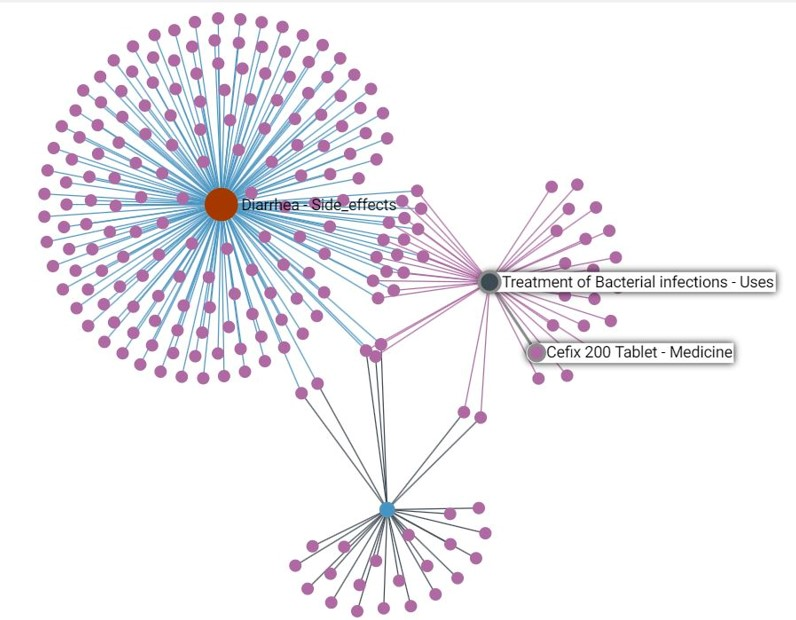

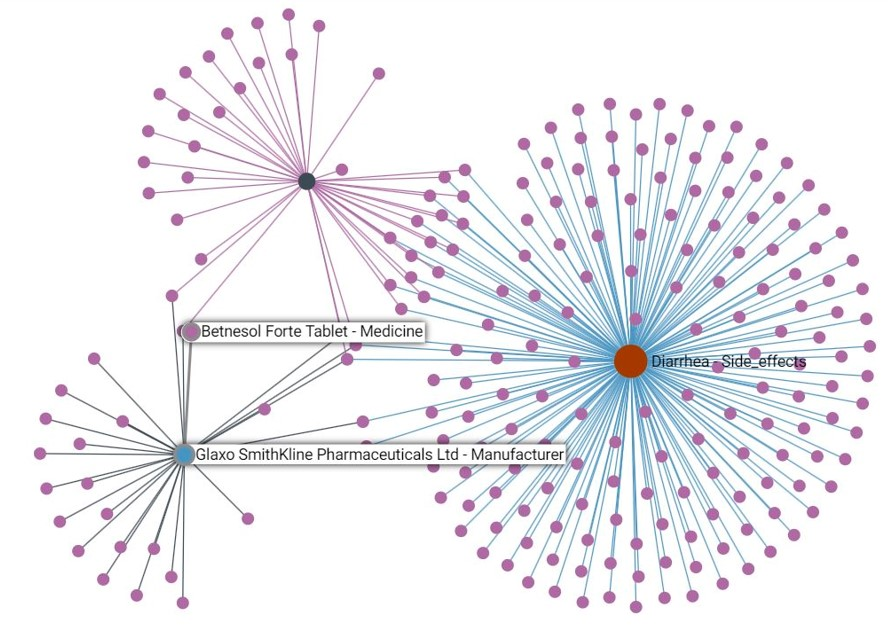

# Made by Aryan Rathore, Reva Bharara
